In [10]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
from pyspark.sql.types import IntegerType

# Inicializando a sessão Spark
spark = SparkSession.builder.appName("AnaliseDeDadosPRF").getOrCreate()

# Lendo o DataFrame
df = spark.read.csv('bd-prf-sudeste.csv', header=True, inferSchema=True)

df.show()


23/11/16 19:36:21 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


+------+----------+-----------+---+---+-----+--------------------+--------------------+----------------+----------------------+-----------+-----------+----------------------+----------+-----------+-------+------+-------------+--------------+------+---------+-------+--------+------------+------------+
|    id|      data|       hora| uf| br|   km|           municipio|      causa_acidente|   tipo_acidente|classificacao_acidente|   fase_dia|sentido_via|condicao_metereologica|tipo_pista|tracado_via|pessoas|mortos|feridos_leves|feridos_graves|ilesos|ignorados|feridos|veiculos|    latitude|   longitude|
+------+----------+-----------+---+---+-----+--------------------+--------------------+----------------+----------------------+-----------+-----------+----------------------+----------+-----------+-------+------+-------------+--------------+------+---------+-------+--------+------------+------------+
|262002|01/10/2020|09:40:00 PM| SP|116|    6|              QUELUZ|Falta de Aten��o ...|Colis�o

In [12]:
df.printSchema()

root
 |-- id: integer (nullable = true)
 |-- data: string (nullable = true)
 |-- hora: string (nullable = true)
 |-- uf: string (nullable = true)
 |-- br: string (nullable = true)
 |-- km: string (nullable = true)
 |-- municipio: string (nullable = true)
 |-- causa_acidente: string (nullable = true)
 |-- tipo_acidente: string (nullable = true)
 |-- classificacao_acidente: string (nullable = true)
 |-- fase_dia: string (nullable = true)
 |-- sentido_via: string (nullable = true)
 |-- condicao_metereologica: string (nullable = true)
 |-- tipo_pista: string (nullable = true)
 |-- tracado_via: string (nullable = true)
 |-- pessoas: integer (nullable = true)
 |-- mortos: integer (nullable = true)
 |-- feridos_leves: integer (nullable = true)
 |-- feridos_graves: integer (nullable = true)
 |-- ilesos: integer (nullable = true)
 |-- ignorados: integer (nullable = true)
 |-- feridos: integer (nullable = true)
 |-- veiculos: integer (nullable = true)
 |-- latitude: double (nullable = true)
 |--

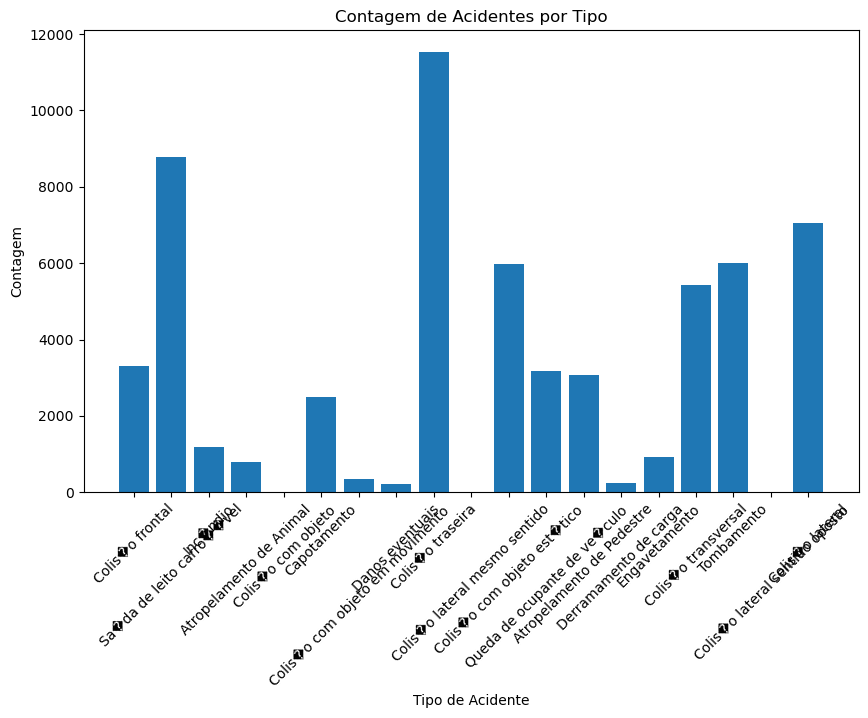

In [4]:
import matplotlib.pyplot as plt

# Exemplo: Contagem de acidentes por tipo
acidente_tipo_count = df.groupBy("tipo_acidente").count().collect()

# Preparando dados para plotagem
tipos = [item['tipo_acidente'] for item in acidente_tipo_count]
counts = [item['count'] for item in acidente_tipo_count]

# Plotando
plt.figure(figsize=(10,6))
plt.bar(tipos, counts)
plt.xticks(rotation=45)
plt.title("Contagem de Acidentes por Tipo")
plt.xlabel("Tipo de Acidente")
plt.ylabel("Contagem")
plt.show()


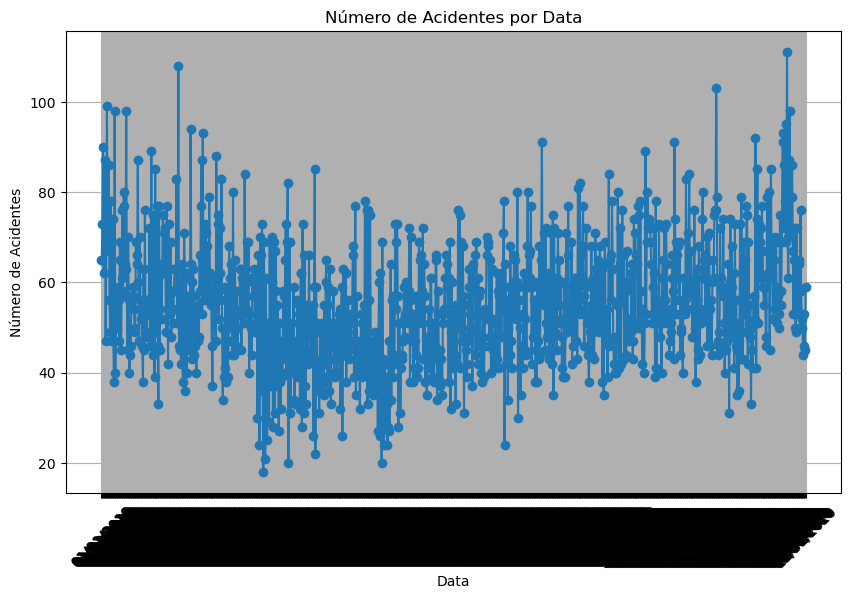

In [24]:
# Converter as colunas do Pandas DataFrame para arrays do NumPy
data_array = pandas_df['data'].to_numpy()
count_array = pandas_df['count'].to_numpy()

# Criando o gráfico de linha
plt.figure(figsize=(10,6))
plt.plot(data_array, count_array, marker='o', linestyle='-')
plt.title('Número de Acidentes por Data')
plt.xlabel('Data')
plt.ylabel('Número de Acidentes')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



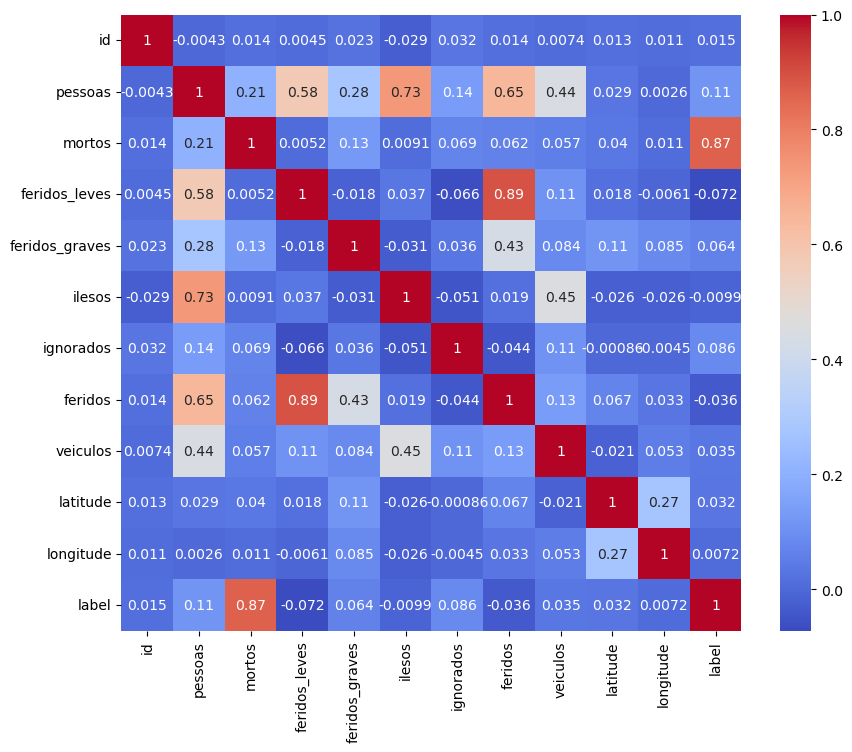

In [26]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.stat import Correlation
import seaborn as sns
import pandas as pd

numeric_features = [t[0] for t in df.dtypes if t[1] in ('int', 'double', 'float')]

vector_col = "corr_features"
assembler = VectorAssembler(inputCols=numeric_features, outputCol=vector_col)
df_vector = assembler.transform(df).select(vector_col)

matrix = Correlation.corr(df_vector, vector_col)

corr_matrix = matrix.collect()[0][0].toArray()
corr_df = pd.DataFrame(corr_matrix, index=numeric_features, columns=numeric_features)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_df, annot=True, cmap='coolwarm')
plt.show()
    
